Importing some libraries

In [89]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from copy import copy

Graph definition and graph transforming function ('cause we need different matrixes for 1-tree relaxation and AP relaxation

In [103]:
G1 = np.array([[np.nan, 2, np.nan, 8, 2, np.nan, np.nan, np.nan], [np.nan, np.nan, 3, 10, 5, np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan, 12, np.nan, np.nan, 7], [np.nan, np.nan, np.nan, np.nan, 14, 3, 1, np.nan], [np.nan, np.nan, np.nan, np.nan, np.nan, 11, 4, 8], [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 6, np.nan], [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 9], [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]])
G2 = np.array([[np.nan, 2, np.nan, 12, 5], [np.nan, np.nan, 4, 8, np.nan], [np.nan, np.nan, np.nan, 3, 3], [np.nan, np.nan, np.nan, np.nan, 10], [np.nan, np.nan, np.nan, np.nan, np.nan]])
G3 = np.array([[np.nan, 12, 10, 19, 8], [np.nan, np.nan, 3, 7, 2], [np.nan, np.nan, np.nan,6,20], [np.nan,np.nan,np.nan,np.nan,4], [np.nan,np.nan,np.nan,np.nan,np.nan,]])

def GrafTrans(G):
  Gt = G.copy()
  for i in range(len(G)):
    for j in range(i, len(G)):
      if i == j:
        Gt[i][j] = np.infty
      elif np.isnan(Gt[i][j]) == False:
        Gt[j][i] = Gt[i][j]
      elif np.isnan(Gt[i][j]):
        Gt[i][j] = np.infty
        Gt[j][i] = np.infty
  return Gt

#GrafTrans(G1)

Functions for seach for MST and for 1-tree

In [91]:
def MST(G):
  n = len(G)
  Gt = G.copy()
  F = []
  for i in range(n):
    F.append({i})
  #F = [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}]
  T = []
  while len(F) > 1:
    ind = np.unravel_index(np.nanargmin(Gt, axis=None), Gt.shape)
    #print(ind, Gt[ind])
    indS = {ind[0], ind[1]}
    cycflag = 0
    for e in F:
      if indS <= e:
        #print('cyc')
        Gt[ind] = np.nan
        cycflag = 1
        break
    if cycflag == 0:
      for i in range(len(F)):
        if not F[i].isdisjoint(indS):
          u = i
          #print(u)
          break
      for i in range(u+1, len(F)):
        if not F[i].isdisjoint(indS):
          v = i
      F[u] = F[u] | F[v]
      Gt[ind] = np.nan
      T.append(ind)
      del F[v]
    #print(F)
  #ax = sns.heatmap(G, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap="crest")
  #for i in range(len(T)):
  #  ax.add_patch(Rectangle((T[i][1], T[i][0]), 1, 1, fill=False, edgecolor='crimson', lw=4, clip_on=False))

  #ax.tick_params(length=0)
  #plt.savefig("MST.jpg", dpi=500)
  #plt.show()
  return T

In [92]:
def tree1(G,T, HL = 0, rem = []):
  #Label = ['A', 'B', 'C', 'D', 'E']
  Label = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']
  Name = ' '
  for e in rem:
    Name = Name + '-' + Label[e[0]]+Label[e[1]]
  counter = np.zeros(len(G))
  n = len(G)
  Gt = G.copy()
  for e in T:
    counter[e[0]] += 1
    counter[e[1]] += 1
    Gt[e] = np.nan
  leaVert = []
  for i in range(len(counter)):
    if counter[i] == 1:
      leaVert.append(i)
  #print(leaVert)
  mins = []
  minV = []
  for e in leaVert:
    if np.count_nonzero(np.isnan(Gt[e])) > n-1:
      minR = 0
    else:
      minR = np.nanargmin(Gt[e])
    if np.count_nonzero(np.isnan(Gt[:, e])) > n-1:
      minC = 0
    else:
      minC = np.nanargmin(Gt[:, e])
    if G[e][minR] < G[minC][e] or np.isnan(G[minC][e]):
      minn = (e, minR)
      minV.append(G[e][minR])
    else:
      minn = (minC, e)
      minV.append(G[minC][e])
    mins.append(minn)
  #print(minV, mins)
  minV = np.array(minV)
  
  addEdge = mins[np.argmax(minV)]
  T.append(addEdge)
  ax = sns.heatmap(G, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap="crest", yticklabels=Label, xticklabels=Label)
  if HL == 0:
    for i in range(len(T)):
      ax.add_patch(Rectangle((T[i][1], T[i][0]), 1, 1, fill=False, edgecolor='crimson', lw=4, clip_on=False))
  else:
    for i in range(len(T) - 1):
      ax.add_patch(Rectangle((T[i][1], T[i][0]), 1, 1, fill=False, edgecolor='crimson', lw=4, clip_on=False))
    ax.add_patch(Rectangle((addEdge[1], addEdge[0]), 1, 1, fill=False, edgecolor='blue', lw=4, clip_on=False))

  ax.tick_params(length=0)
  plt.savefig('1-tree' + Name + '.jpg', dpi=500)
  plt.show()
  return T

def THC(G0, G, T, rem):
  #Label = ['A', 'B', 'C', 'D', 'E']
  Label = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']
  counter = np.zeros(len(G))
  n = len(G)
  Gt = G.copy()
  for e in T:
    counter[e[0]] += 1
    counter[e[1]] += 1
    Gt[e] = np.nan
  leaVert = []
  for i in range(len(counter)):
    if counter[i] == 1:
      leaVert.append(i)
  #print(leaVert)
  mins = []
  minV = []
  for e in leaVert:
    if np.count_nonzero(np.isnan(Gt[e])) > n-1:
      minR = 0
    else:
      minR = np.nanargmin(Gt[e])
    if np.count_nonzero(np.isnan(Gt[:, e])) > n-1:
      minC = 0
    else:
      minC = np.nanargmin(Gt[:, e])
    if G[e][minR] < G[minC][e] or np.isnan(G[minC][e]):
      minn = (e, minR)
      minV.append(G[e][minR])
    else:
      minn = (minC, e)
      minV.append(G[minC][e])
    mins.append(minn)
  #print(minV, mins)
  minV = np.array(minV)
  
  addEdge = mins[np.argmax(minV)]
  T.append(addEdge)
  ax = sns.heatmap(G0, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap="crest", yticklabels=Label, xticklabels=Label)
  for i in range(len(T)):
    ax.add_patch(Rectangle((T[i][1], T[i][0]), 1, 1, fill=False, edgecolor='crimson', lw=4, clip_on=False))
  for i in range(len(rem)):
    ax.add_patch(Rectangle((rem[i][1], rem[i][0]), 1, 1, fill=False, edgecolor='blue', lw=4, clip_on=False))
  ax.tick_params(length=0)
  plt.savefig("HC.jpg", dpi=500)
  plt.show()
  return T

Function, that checks whether tree is hamiltonian cycle or not

In [93]:
def IsHamCyc(T, n):
  c = np.zeros(n)
  for e in T:
    c[e[0]] += 1
    c[e[1]] += 1
  for e in c:
    if e > 2 or e < 2:
      return False
  return True

1-trees for all 3 graphs

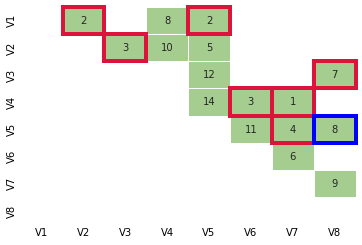

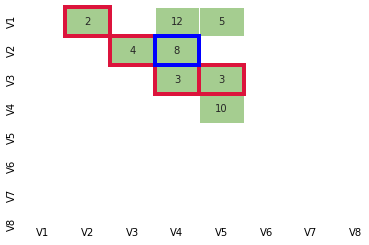

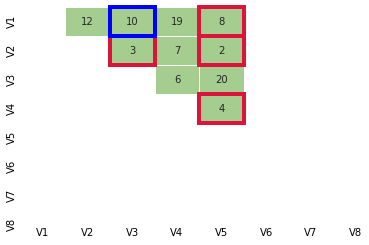

In [94]:
T1 = tree1(G1, MST(G1), HL = 1)

T2 = tree1(G2, MST(G2), 1)

T3 = tree1(G3, MST(G3), 1)

Main functions for BnB algorithms

In [95]:
def remEdges(G, T):
  n = len(G)
  c = np.zeros(n)
  for e in T:
    c[e[0]] += 1
    c[e[1]] += 1

  for i in range(n):
    if c[i] <= 2:
      c[i] = 2*n
  c = np.array(c)
  v = np.argmin(c)
  print("branch in vertex",  v)
  edgelist = []
  for e in T:
    if e[0] == v or e[1] == v:
      edgelist.append(e)
  return edgelist

def remSort(G, rem):
  rg = []
  for r in rem:
    rg.append(G[r])
  rg = np.array(rg)
  a = np.argsort(rg)
  #print(a)
  newR = []
  a = np.flip(a)
  #a = (np.rint(a)).astype(int)
  #print(a)
  #print(rem)
  for i in a:
    newR.append(rem[i])
  return newR

def edgeSum(G, T):
  S = 0
  for e in T:
    S += G[e]
  return S

def bound(G, remE):
  n = len(G)
  #Label = ['A', 'B', 'C', 'D', 'E']
  Label = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']
  Name = ' '
  for e in remE:
    Name = Name + '-' + Label[e[0]]+Label[e[1]]
  Gt = G.copy()
  m = n**2 - np.count_nonzero(np.isnan(Gt))
  if m - n < 1:
    print("no more edges to delete")
    return False, np.infty, Gt, []
  for e in remE:
    print('-'+Label[e[0]]+Label[e[1]], sep ='', end = ' ')
    Gt[e] = np.nan
  c = np.zeros(n)
  for row in range(n):
    c[row] = 2*n - np.count_nonzero(np.isnan(Gt[row])) - np.count_nonzero(np.isnan(Gt[:, row]))
  #print("c is", c)
  for e in c:
    if e < 2:
      print("one vertex has d < 2 in graph")
      return False, np.infty, Gt, []
  T1 = tree1(Gt, MST(Gt), rem = remE)
  if IsHamCyc(T1, len(Gt)):
    return True, edgeSum(Gt, T1), Gt, []
  else:
    return False, edgeSum(Gt, T1), Gt, remEdges(Gt, T1)

def branch(G, remE, bestcyc = np.infty):
  n = len(G)
  #print('full graph 1-tree')
  #T = tree1(G, MST(G))
  #remE = []
  #CurRem = []
  #bestcyc = np.infty
  #print(remE)
  IsHam, Sum, Gt, RE = bound(G, remE)
  besttree = remE
  print("LB is", Sum)
  if IsHam:
    print("Ham")
    if Sum < bestcyc:
      bestcyc = Sum
      besttree = remE
      print("now best HC is", Sum)
      return bestcyc, besttree
      
    else:
      print("this HC isn't best", Sum, " the best is", bestcyc)
      return bestcyc, besttree
  else:
    if Sum < bestcyc:
      RE = remSort(G, RE)
      for e in RE:
        Sum41, tree = branch(Gt, remE + [e], bestcyc)
        if Sum41 < bestcyc:
          bestcyc = Sum41
          besttree = tree
      return bestcyc, besttree
    else:
      print(Sum,"is more than", bestcyc, "- best HC")
      return bestcyc, besttree

def Hcheck(G):
  n = len(G)
  for i in range(n):
    realR =  n - np.count_nonzero(np.isfinite(G[i]))
    realC =  n - np.count_nonzero(np.isfinite(G[:,i]))
    if realR < 1 or realC < 1:
      return False
    
  return True
    

def Grem(G, remE):
  Gt = G.copy()
  Gt[remE] = np.infty
  return Gt

def brancH(G, Label, bestcyc = np.infty, remD = []):
  Gt = G.copy()
  if Hcheck == False:
    for e in remD:
      print('-'+Label[e[0]]+Label[e[1]], sep ='', end = ' ')
    print("\n 1 vertex has d < 2")
    return np.infty, []
  for e in remD:
    print('-'+Label[e[0]]+Label[e[1]], sep ='', end = ' ')
  P, LB = Hungary(Gt, Label, remD)
  besttree = P
  cyc, m = cycles(P)

  print(LB)
  if m == 1:
    print("Ham!")
    if LB < bestcyc:
      bestcyc = LB
      besttree = P
      print("new best cyc is", LB)
      return bestcyc, besttree

    else:
      print(bestcyc, "is better than", LB)
      return bestcyc, besttree
  else:
    if LB < bestcyc:
      shtuki = []
      for i in cyc:
        shtuki.append(len(i))
      sh = np.array(shtuki)
      mincyc = np.argmin(sh)
      for e in cyc[mincyc]:
        #print('-'+Label[e[0]]+Label[e[1]], sep ='', end = ' ')
        LB41, tree = brancH(Grem(Gt, e), Label, bestcyc, remD + [e])
        if LB41 < bestcyc:
          bestcyc = LB41
          besttree = tree
      return bestcyc, besttree
    else:
      print("LB", LB, "is more than best -", bestcyc)
      return bestcyc, besttree

def HC(tree, G):
  n = len(G)
  Gt = G.copy()
  for e in tree:
    #print('-',e, sep ='', end = ' ')
    Gt[e] = np.nan
  T1 = THC(G, Gt, MST(Gt), tree)
  print("Sum is", edgeSum(Gt, T1))

def HHC(edges, G, Label):
  ax = sns.heatmap(G, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap='crest', yticklabels=Label, xticklabels=Label)
  for i in range(len(edges)):
    ax.add_patch(Rectangle((edges[i][1], edges[i][0]), 1, 1, fill=False, edgecolor='crimson', lw=4, clip_on=False))
    
  ax.tick_params(length=0)
  plt.savefig("HungaryHC.jpg", dpi=500)
  plt.show()


Functions for hungarian algorithm

In [96]:
def min_zero_row(zero_mat, mark_zero):

    #Find the row
    min_row = [99999, -1]

    for row_num in range(zero_mat.shape[0]): 
        if np.sum(zero_mat[row_num] == True) > 0 and min_row[0] > np.sum(zero_mat[row_num] == True):
            min_row = [np.sum(zero_mat[row_num] == True), row_num]

    # Marked the specific row and column as False
    zero_index = np.where(zero_mat[min_row[1]] == True)[0][0]
    mark_zero.append((min_row[1], zero_index))
    zero_mat[min_row[1], :] = False
    zero_mat[:, zero_index] = False

def mark_matrix(mat):

  #Transform the matrix to boolean matrix(0 = True, others = False)
  cur_mat = mat
  zero_bool_mat = (cur_mat == 0)
  zero_bool_mat_copy = zero_bool_mat.copy()

  #Recording possible answer positions by marked_zero
  marked_zero = []
  #num = 0
  while (True in zero_bool_mat_copy):
    min_zero_row(zero_bool_mat_copy, marked_zero)
    #ax = sns.heatmap(zero_bool_mat_copy, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap='cool')
    #ax.tick_params(length=0)
    #plt.savefig('Mark_'+ str(num)+'.jpg', dpi=500)
    #num += 1
    #plt.show()
  #ax = sns.heatmap(cur_mat, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap="Wistia")
  #for i in range(len(marked_zero)):
    #ax.add_patch(Rectangle((marked_zero[i][1], marked_zero[i][0]), 1, 1, fill=False, edgecolor='crimson', lw=4, clip_on=False))
  #ax.tick_params(length=0)
  #plt.savefig('marked_'+str(num)+'.jpg', dpi=500)
  #plt.show()
  #Recording the row and column positions seperately.
  marked_zero_row = []
  marked_zero_col = []
  for i in range(len(marked_zero)):
    marked_zero_row.append(marked_zero[i][0])
    marked_zero_col.append(marked_zero[i][1])

  #Step 2-2-1
  non_marked_row = list(set(range(cur_mat.shape[0])) - set(marked_zero_row))
	
  marked_cols = []
  check_switch = True
  while check_switch:
    check_switch = False
    for i in range(len(non_marked_row)):
      row_array = zero_bool_mat[non_marked_row[i], :]
      for j in range(row_array.shape[0]):
        #Step 2-2-2
        if row_array[j] == True and j not in marked_cols:
          #Step 2-2-3
          marked_cols.append(j)
          check_switch = True

    for row_num, col_num in marked_zero:
      #Step 2-2-4
      if row_num not in non_marked_row and col_num in marked_cols:
        #Step 2-2-5
        non_marked_row.append(row_num)
        check_switch = True
  #Step 2-2-6
  marked_rows = list(set(range(mat.shape[0])) - set(non_marked_row))

  return(marked_zero, marked_rows, marked_cols)
 
def adjust_matrix(mat, cover_rows, cover_cols):
  cur_mat = mat
  non_zero_element = []

  #Step 4-1
  for row in range(len(cur_mat)):
    if row not in cover_rows:
      for i in range(len(cur_mat[row])):
        if i not in cover_cols:
          non_zero_element.append(cur_mat[row][i])
          #print(row, i)
  min_num = min(non_zero_element)
  
  if np.isnan(min_num):
    print("Assignment sun is infty")
    return cur_mat, True
  #Step 4-2
  for row in range(len(cur_mat)):
    if row not in cover_rows:
      for i in range(len(cur_mat[row])):
        if i not in cover_cols:
          cur_mat[row, i] = cur_mat[row, i] - min_num
  #Step 4-3
  for row in range(len(cover_rows)):  
    for col in range(len(cover_cols)):
      cur_mat[cover_rows[row], cover_cols[col]] = cur_mat[cover_rows[row], cover_cols[col]] + min_num
  return cur_mat, False


def ans_calculation(mat, pos):
	total = 0
	#ans_mat = np.zeros((mat.shape[0], mat.shape[1]))
	for i in range(len(pos)):
		total += mat[pos[i][0], pos[i][1]]
		#ans_mat[pos[i][0], pos[i][1]] = mat[pos[i][0], pos[i][1]]
	return total

def Hungary(M, Label, rem):
  n = len(M)
  Name = ' '
  for e in rem:
    Name = Name + '-' + Label[e[0]]+Label[e[1]]
  current = M.copy()
  for i in range(n):
    current[i] = current[i] - np.min(current[i])
  for i in range(n):
    current[:,i] = current[:,i] - np.min(current[:,i])
  #ax = sns.heatmap(current, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap='Paired')
  #ax.tick_params(length=0)
  #plt.savefig("H_step1.jpg", dpi=500)
  #plt.show()

  zero_count = 0
  num = 0
  while zero_count < n:
    ans_pos, marked_rows, marked_cols = mark_matrix(current)
    zero_count = len(marked_rows) + len(marked_cols)

    #ax = sns.heatmap(current, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap="cool")
    #for i in range(len(ans_pos)):
    #  ax.add_patch(Rectangle((ans_pos[i][1], ans_pos[i][0]), 1, 1, fill=False, edgecolor='crimson', lw=4, clip_on=False))
    #ax.tick_params(length=0)
    #plt.savefig('current_'+str(num)+'.jpg', dpi=500)
    #plt.show()

    if zero_count < n:
      current, fuck = adjust_matrix(current, marked_rows, marked_cols)
      if fuck:
        return [], np.infty
      num += 1

  ax = sns.heatmap(M, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap='Paired', yticklabels=Label, xticklabels=Label)
  for i in range(len(ans_pos)):
    ax.add_patch(Rectangle((ans_pos[i][1], ans_pos[i][0]), 1, 1, fill=False, edgecolor='crimson', lw=4, clip_on=False))
    
  ax.tick_params(length=0)
  plt.savefig('Hung' + Name + '.jpg', dpi=500)
  plt.show()
  Sum = ans_calculation(M, ans_pos)
  return ans_pos, Sum

def cycles(P):
  sets = []
  P0 = P.copy()
  while len(P0) > 0:
    A = []
    #print("P0:", P0)
    s = P0.pop(0)
    A.append(s)
    flag = 0
    i = 0
    I = s[0]
    done = 0
    while flag == 0:
      if i == len(P0):
        i = 0
        done = 1
      if s[1] == P0[i][0]:
        if I == P0[i][1]:
          flag = 1
        s = P0.pop(i)
        i = 0
        A.append(s)
      elif I == P0[i][1] and done == 1:
        s = P0.pop(i)
        i = 0
        A.append(s)
        flag = 1
      else:
        i += 1
      #print("A:", A, "; i:", i)
    sets.append(A)
  return sets, len(sets)

HamCycle by 1-tree relaxation in graph $G_3$



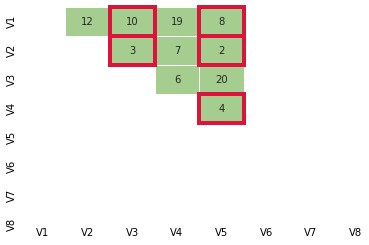

branch in vertex 4
LB is 27.0
-V1V5 

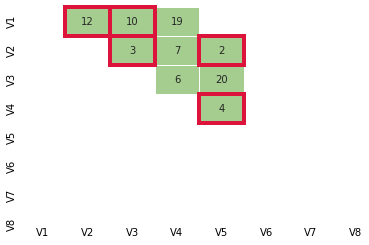

branch in vertex 1
LB is 31.0
-V1V5 -V1V2 

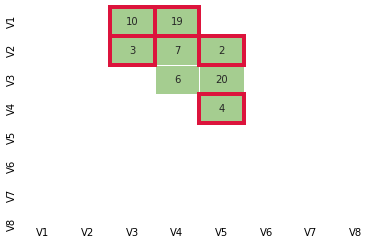

LB is 38.0
Ham
now best HC is 38.0
-V1V5 -V2V3 

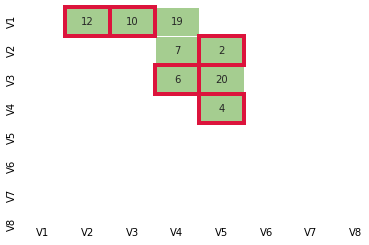

LB is 34.0
Ham
now best HC is 34.0
-V1V5 -V2V5 

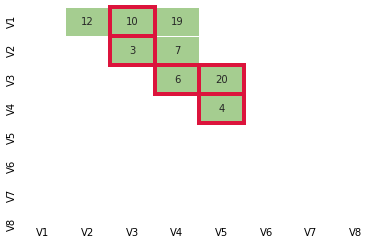

branch in vertex 2
LB is 43.0
43.0 is more than 34.0 - best HC
-V4V5 

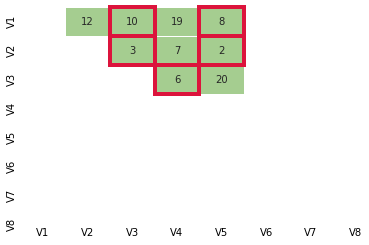

branch in vertex 2
LB is 29.0
-V4V5 -V1V3 

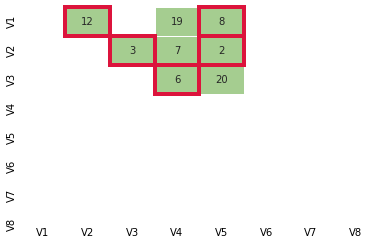

branch in vertex 1
LB is 31.0
-V4V5 -V1V3 -V1V2 

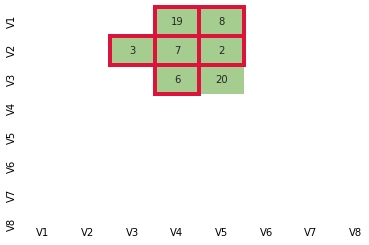

LB is 38.0
Ham
this HC isn't best 38.0  the best is 34.0
-V4V5 -V1V3 -V2V3 

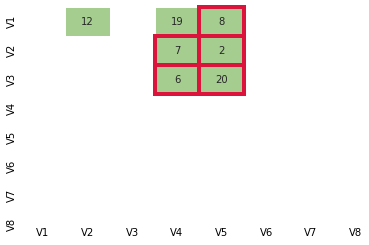

branch in vertex 4
LB is 43.0
43.0 is more than 34.0 - best HC
-V4V5 -V1V3 -V2V5 

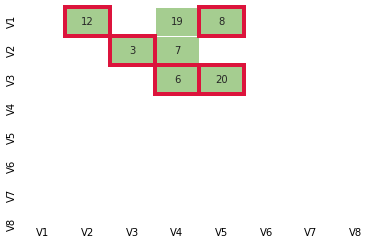

branch in vertex 2
LB is 49.0
49.0 is more than 34.0 - best HC
-V4V5 -V3V4 

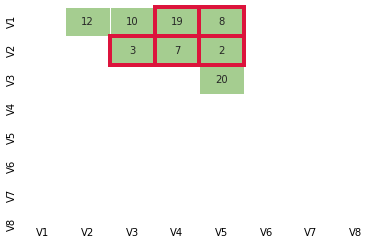

branch in vertex 1
LB is 39.0
39.0 is more than 34.0 - best HC
-V4V5 -V2V3 

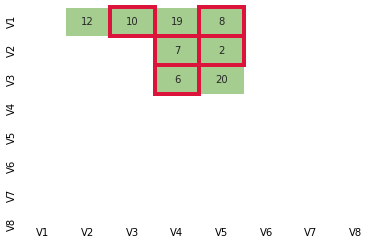

LB is 33.0
Ham
now best HC is 33.0
-V2V5 

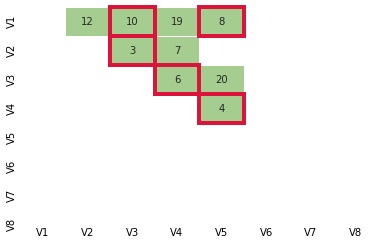

branch in vertex 2
LB is 31.0
-V2V5 -V1V3 

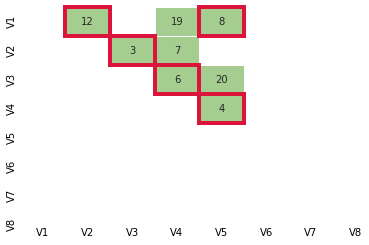

LB is 33.0
Ham
this HC isn't best 33.0  the best is 33.0
-V2V5 -V3V4 

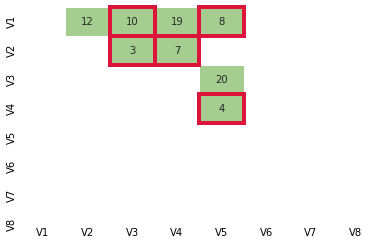

LB is 32.0
Ham
now best HC is 32.0
-V2V5 -V2V3 

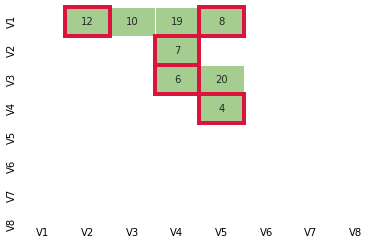

branch in vertex 3
LB is 37.0
37.0 is more than 32.0 - best HC


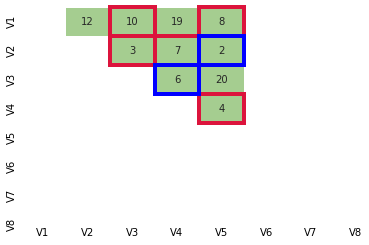

Sum is 32.0


In [104]:
RE = []
S, t = branch(G3, RE)
HC(t, G3)

In graph $G_1$

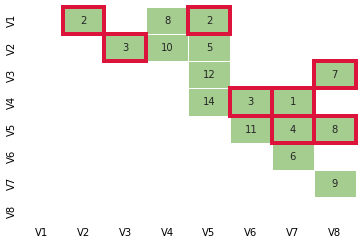

branch in vertex 4
LB is 30.0
-V5V8 

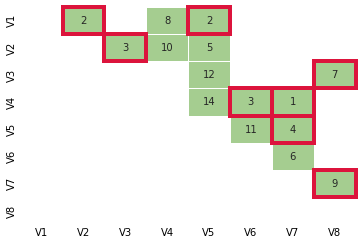

branch in vertex 6
LB is 31.0
-V5V8 -V7V8 one vertex has d < 2 in graph
LB is inf
inf is more than inf - best HC
-V5V8 -V5V7 

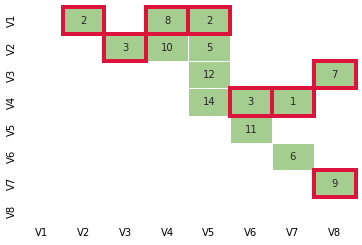

branch in vertex 0
LB is 35.0
-V5V8 -V5V7 -V1V4 

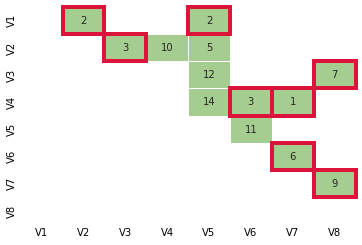

branch in vertex 6
LB is 33.0
-V5V8 -V5V7 -V1V4 -V7V8 one vertex has d < 2 in graph
LB is inf
inf is more than inf - best HC
-V5V8 -V5V7 -V1V4 -V6V7 

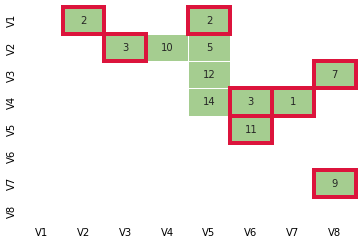

LB is 38.0
Ham
now best HC is 38.0
-V5V8 -V5V7 -V1V4 -V4V7 

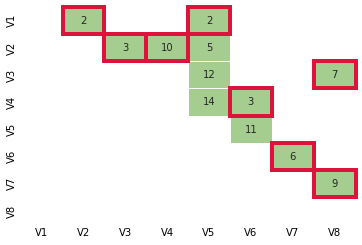

branch in vertex 1
LB is 42.0
42.0 is more than 38.0 - best HC
-V5V8 -V5V7 -V1V5 

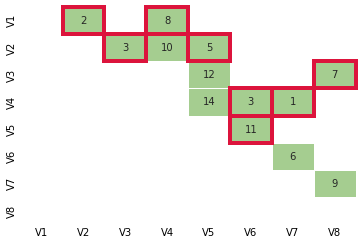

branch in vertex 1
LB is 40.0
40.0 is more than 38.0 - best HC
-V5V8 -V5V7 -V1V2 

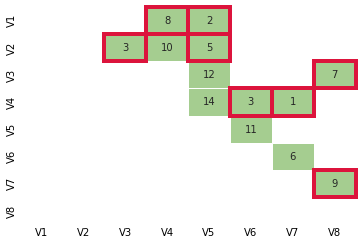

branch in vertex 3
LB is 38.0
38.0 is more than 38.0 - best HC
-V5V8 -V4V7 

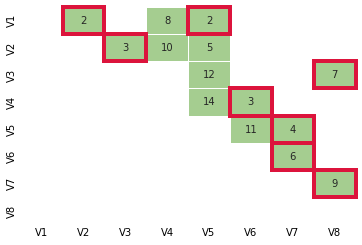

branch in vertex 6
LB is 36.0
-V5V8 -V4V7 -V7V8 one vertex has d < 2 in graph
LB is inf
inf is more than 38.0 - best HC
-V5V8 -V4V7 -V6V7 

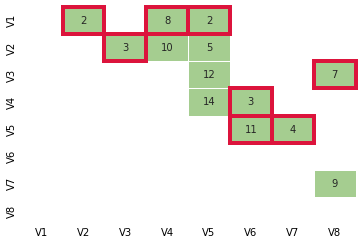

branch in vertex 0
LB is 40.0
40.0 is more than 38.0 - best HC
-V5V8 -V4V7 -V5V7 

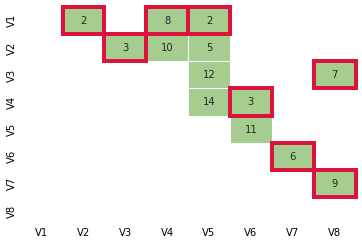

branch in vertex 0
LB is 40.0
40.0 is more than 38.0 - best HC
-V5V7 

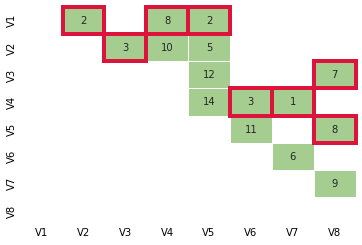

branch in vertex 0
LB is 34.0
-V5V7 -V1V4 

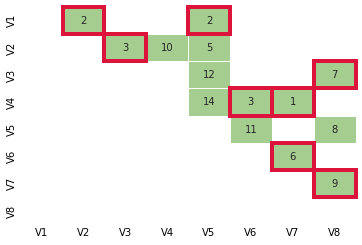

branch in vertex 6
LB is 33.0
-V5V7 -V1V4 -V7V8 

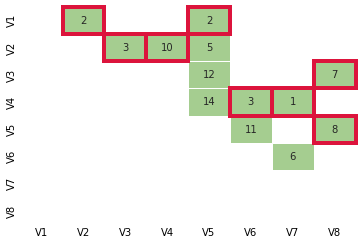

branch in vertex 1
LB is 36.0
-V5V7 -V1V4 -V7V8 -V2V4 

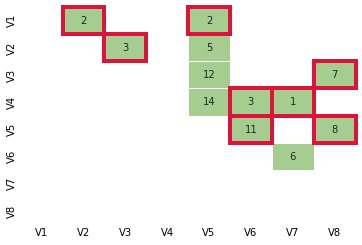

branch in vertex 4
LB is 37.0
-V5V7 -V1V4 -V7V8 -V2V4 -V5V6 

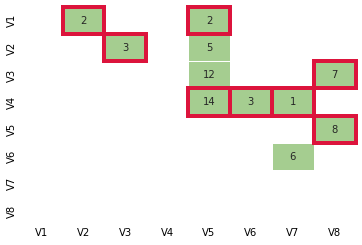

branch in vertex 3
LB is 40.0
40.0 is more than 38.0 - best HC
-V5V7 -V1V4 -V7V8 -V2V4 -V5V8 one vertex has d < 2 in graph
LB is inf
inf is more than 38.0 - best HC
-V5V7 -V1V4 -V7V8 -V2V4 -V1V5 one vertex has d < 2 in graph
LB is inf
inf is more than 38.0 - best HC
-V5V7 -V1V4 -V7V8 -V2V3 

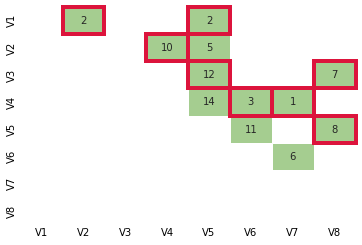

branch in vertex 3
LB is 45.0
45.0 is more than 38.0 - best HC
-V5V7 -V1V4 -V7V8 -V1V2 one vertex has d < 2 in graph
LB is inf
inf is more than 38.0 - best HC
-V5V7 -V1V4 -V6V7 

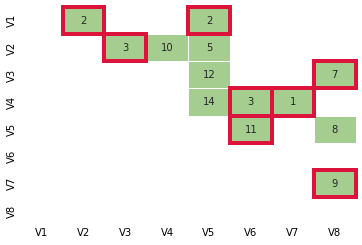

LB is 38.0
Ham
this HC isn't best 38.0  the best is 38.0
-V5V7 -V1V4 -V4V7 

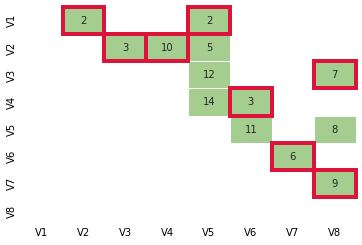

branch in vertex 1
LB is 42.0
42.0 is more than 38.0 - best HC
-V5V7 -V1V5 

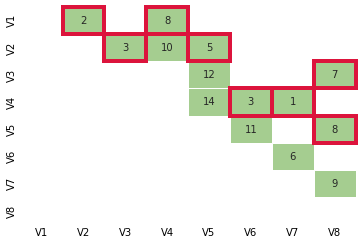

branch in vertex 1
LB is 37.0
-V5V7 -V1V5 -V2V5 

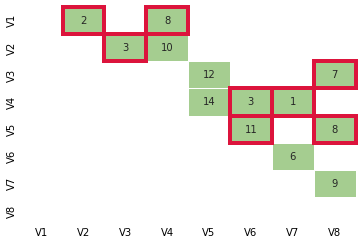

branch in vertex 3
LB is 43.0
43.0 is more than 38.0 - best HC
-V5V7 -V1V5 -V2V3 

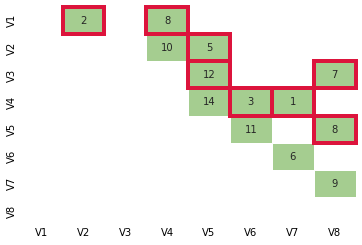

branch in vertex 3
LB is 46.0
46.0 is more than 38.0 - best HC
-V5V7 -V1V5 -V1V2 one vertex has d < 2 in graph
LB is inf
inf is more than 38.0 - best HC
-V5V7 -V1V2 

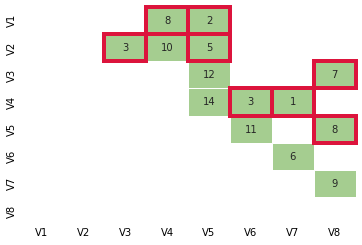

branch in vertex 3
LB is 37.0
-V5V7 -V1V2 -V1V4 one vertex has d < 2 in graph
LB is inf
inf is more than 38.0 - best HC
-V5V7 -V1V2 -V4V6 

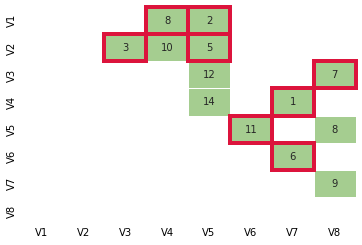

branch in vertex 4
LB is 43.0
43.0 is more than 38.0 - best HC
-V5V7 -V1V2 -V4V7 

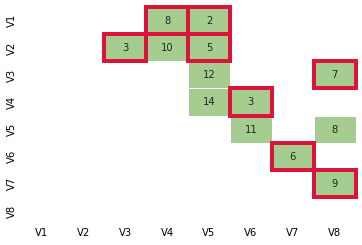

LB is 43.0
Ham
this HC isn't best 43.0  the best is 38.0
-V1V5 

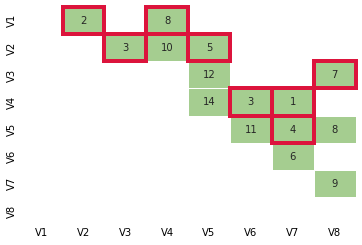

branch in vertex 1
LB is 33.0
-V1V5 -V2V5 

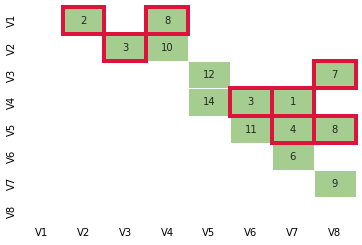

branch in vertex 3
LB is 36.0
-V1V5 -V2V5 -V1V4 one vertex has d < 2 in graph
LB is inf
inf is more than 38.0 - best HC
-V1V5 -V2V5 -V4V6 

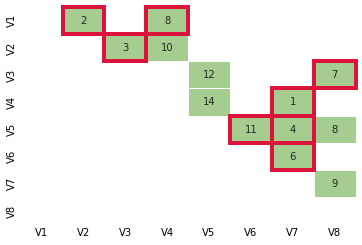

branch in vertex 6
LB is 42.0
42.0 is more than 38.0 - best HC
-V1V5 -V2V5 -V4V7 

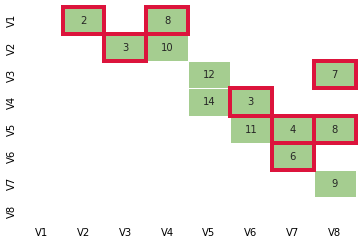

LB is 41.0
Ham
this HC isn't best 41.0  the best is 38.0
-V1V5 -V2V3 

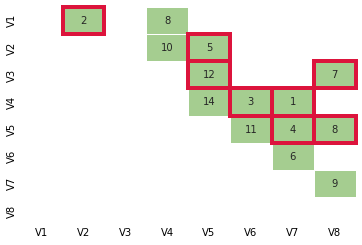

branch in vertex 4
LB is 42.0
42.0 is more than 38.0 - best HC
-V1V5 -V1V2 one vertex has d < 2 in graph
LB is inf
inf is more than 38.0 - best HC


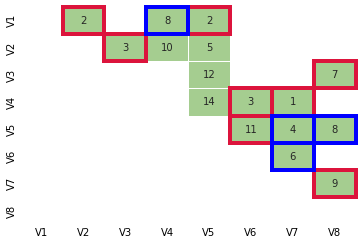

Sum is 38.0


In [105]:
RE = []
S, t = branch(G1, RE)
HC(t, G1)

And in graph $G_2$

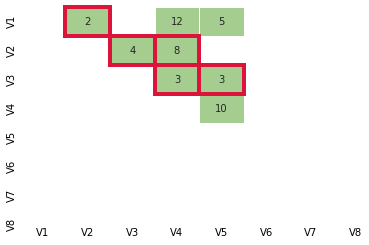

branch in vertex 1
LB is 20.0
-V2V4 

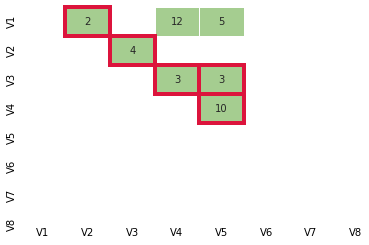

branch in vertex 2
LB is 22.0
-V2V4 -V2V3 one vertex has d < 2 in graph
LB is inf
inf is more than inf - best HC
-V2V4 -V3V5 

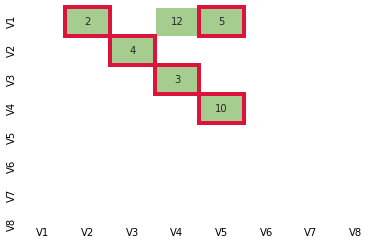

LB is 24.0
Ham
now best HC is 24.0
-V2V4 -V3V4 

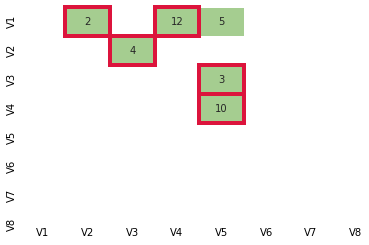

LB is 31.0
Ham
this HC isn't best 31.0  the best is 24.0
-V2V3 

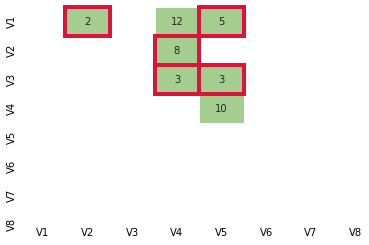

LB is 21.0
Ham
now best HC is 21.0
-V1V2 

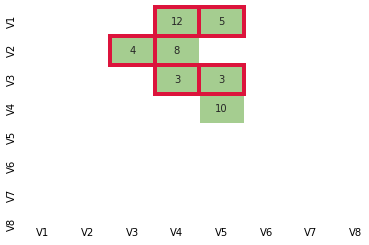

branch in vertex 2
LB is 27.0
27.0 is more than 21.0 - best HC


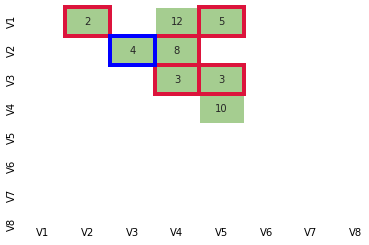

Sum is 21.0


In [106]:
RE = []
S, t = branch(G2, RE)
HC(t, G2)

Graph transformation for AP relaxation

In [107]:
G1 = GrafTrans(G1)
G2 = GrafTrans(G2)
G3 = GrafTrans(G3)
Label2 = ['A', 'B', 'C', 'D', 'E']
Label1 = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']
G3

array([[inf, 12., 10., 19.,  8.],
       [12., inf,  3.,  7.,  2.],
       [10.,  3., inf,  6., 20.],
       [19.,  7.,  6., inf,  4.],
       [ 8.,  2., 20.,  4., inf]])

HamCycle by AP relaxation in graph $G_1$



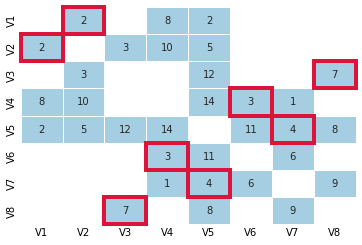

32.0
-V1V2 

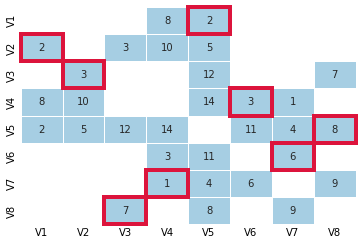

32.0
-V1V2 -V4V6 

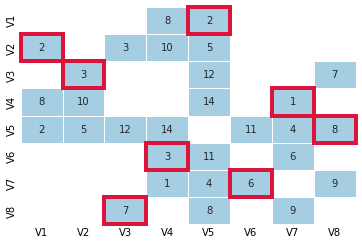

32.0
-V1V2 -V4V6 -V4V7 

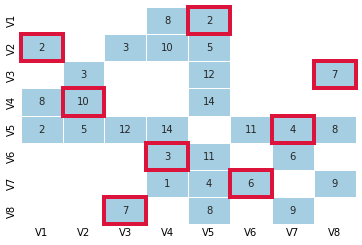

41.0
-V1V2 -V4V6 -V4V7 -V8V3 

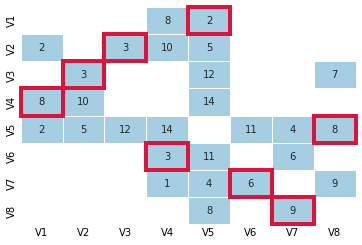

42.0
-V1V2 -V4V6 -V4V7 -V8V3 -V2V3 

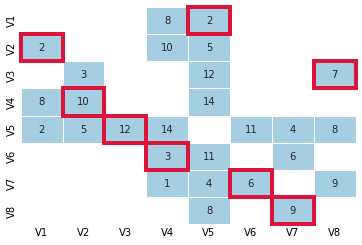

51.0
Ham!
new best cyc is 51.0
-V1V2 -V4V6 -V4V7 -V8V3 -V3V2 

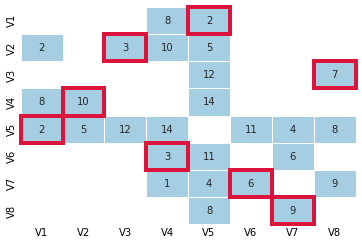

42.0
-V1V2 -V4V6 -V4V7 -V8V3 -V3V2 -V1V5 

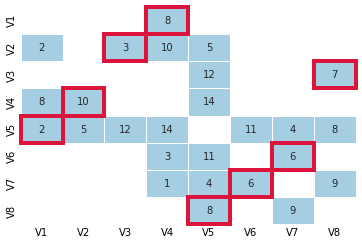

50.0
-V1V2 -V4V6 -V4V7 -V8V3 -V3V2 -V1V5 -V6V7 

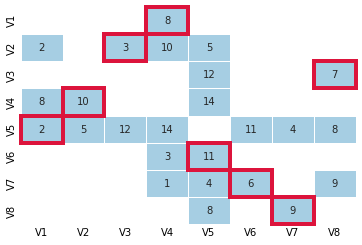

56.0
Ham!
51.0 is better than 56.0
-V1V2 -V4V6 -V4V7 -V8V3 -V3V2 -V1V5 -V7V6 Assignment sun is infty
inf
LB inf is more than best - 51.0
-V1V2 -V4V6 -V4V7 -V8V3 -V3V2 -V5V1 

<ipython-input-96-09ba42bdfe57>:94: RuntimeWarning: invalid value encountered in double_scalars
  cur_mat[row, i] = cur_mat[row, i] - min_num


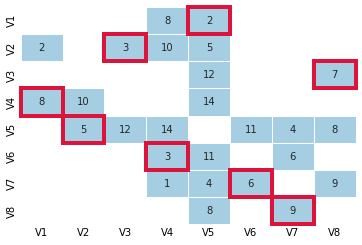

43.0
Ham!
new best cyc is 43.0
-V1V2 -V4V6 -V4V7 -V3V8 

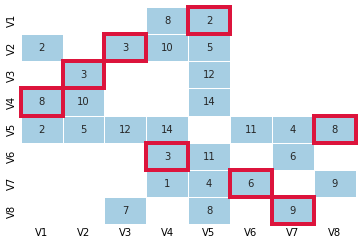

42.0
-V1V2 -V4V6 -V4V7 -V3V8 -V3V2 

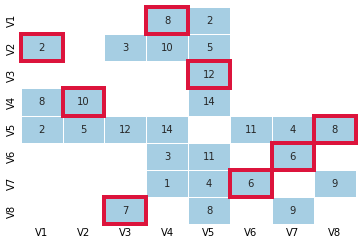

59.0
LB 59.0 is more than best - 43.0
-V1V2 -V4V6 -V4V7 -V3V8 -V2V3 

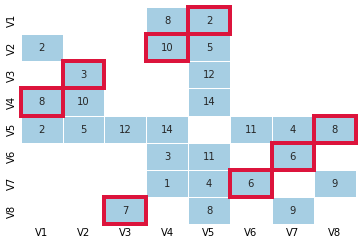

50.0
LB 50.0 is more than best - 43.0
-V1V2 -V4V6 -V7V6 

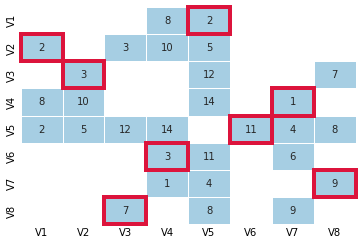

38.0
Ham!
new best cyc is 38.0
-V1V2 -V4V6 -V6V4 

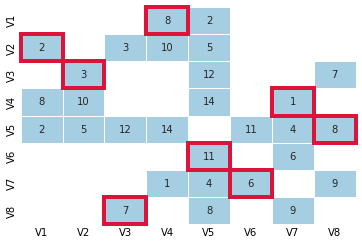

46.0
Ham!
38.0 is better than 46.0
-V1V2 -V6V7 

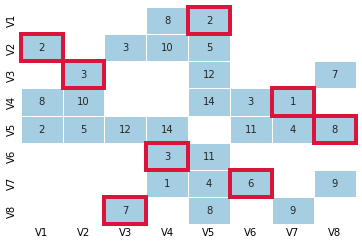

32.0
-V1V2 -V6V7 -V6V4 

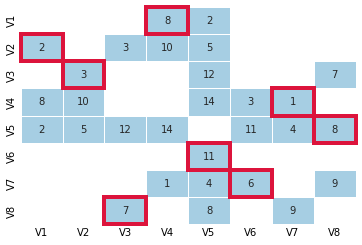

46.0
Ham!
38.0 is better than 46.0
-V1V2 -V6V7 -V4V7 

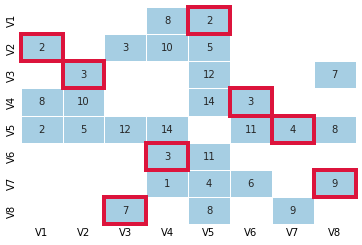

33.0
-V1V2 -V6V7 -V4V7 -V4V6 

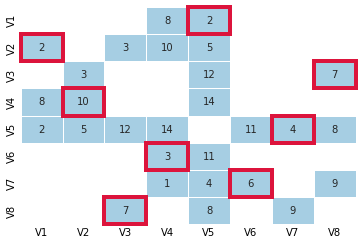

41.0
LB 41.0 is more than best - 38.0
-V1V2 -V6V7 -V4V7 -V6V4 

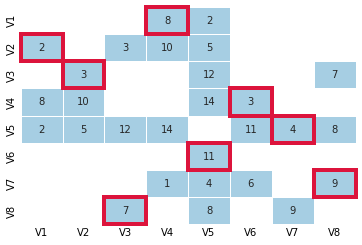

47.0
Ham!
38.0 is better than 47.0
-V1V2 -V6V7 -V7V6 

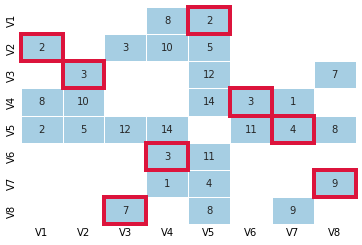

33.0
-V1V2 -V6V7 -V7V6 -V6V4 

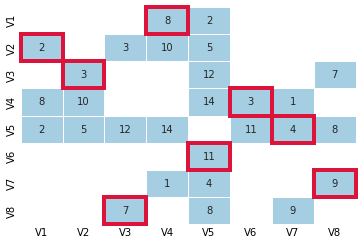

47.0
Ham!
38.0 is better than 47.0
-V1V2 -V6V7 -V7V6 -V4V6 

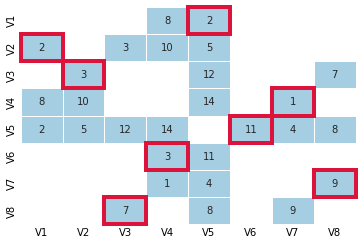

38.0
Ham!
38.0 is better than 38.0
-V1V2 -V7V4 

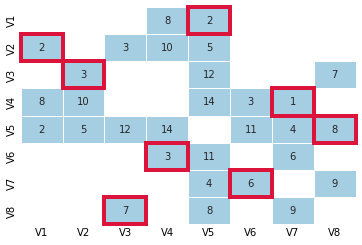

32.0
-V1V2 -V7V4 -V6V4 

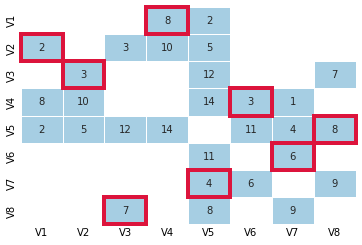

41.0
Ham!
38.0 is better than 41.0
-V1V2 -V7V4 -V4V7 

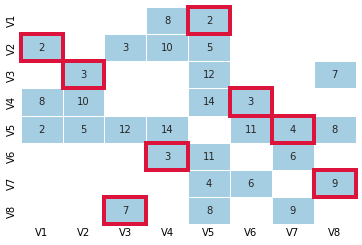

33.0
-V1V2 -V7V4 -V4V7 -V4V6 

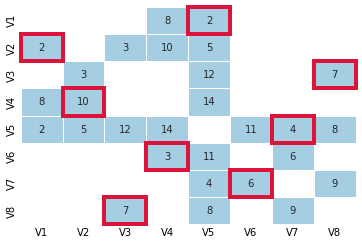

41.0
LB 41.0 is more than best - 38.0
-V1V2 -V7V4 -V4V7 -V6V4 

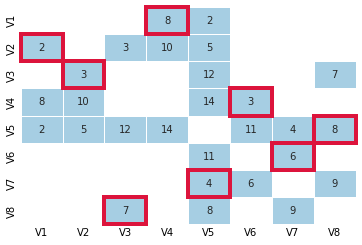

41.0
Ham!
38.0 is better than 41.0
-V1V2 -V7V4 -V7V6 

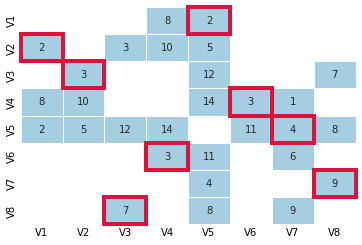

33.0
-V1V2 -V7V4 -V7V6 -V6V4 

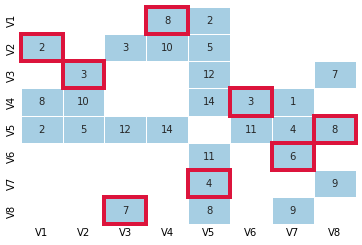

41.0
Ham!
38.0 is better than 41.0
-V1V2 -V7V4 -V7V6 -V4V6 

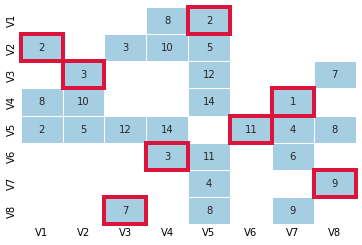

38.0
Ham!
38.0 is better than 38.0
-V2V1 

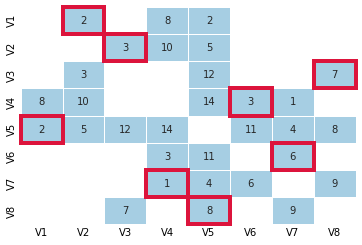

32.0
-V2V1 -V4V6 

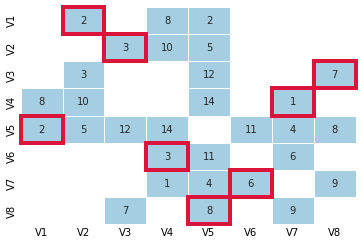

32.0
-V2V1 -V4V6 -V4V7 

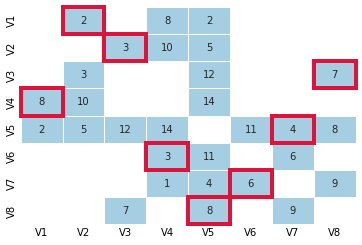

41.0
Ham!
38.0 is better than 41.0
-V2V1 -V4V6 -V7V6 

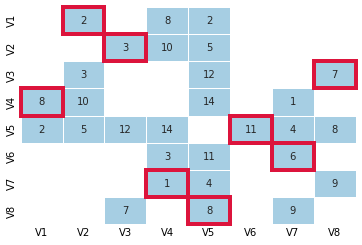

46.0
Ham!
38.0 is better than 46.0
-V2V1 -V4V6 -V6V4 

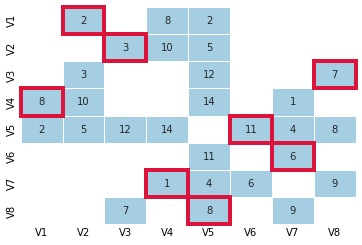

46.0
Ham!
38.0 is better than 46.0
-V2V1 -V6V7 

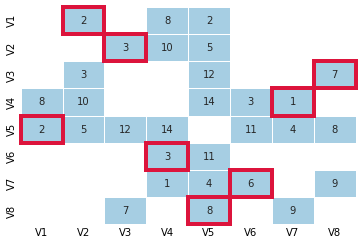

32.0
-V2V1 -V6V7 -V6V4 

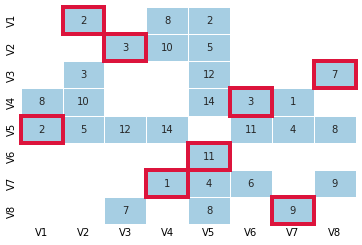

38.0
Ham!
38.0 is better than 38.0
-V2V1 -V6V7 -V4V7 

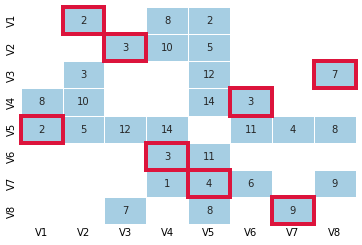

33.0
-V2V1 -V6V7 -V4V7 -V4V6 

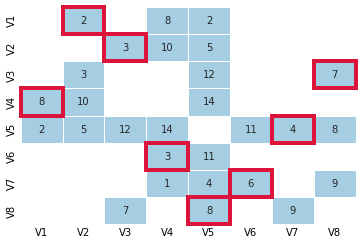

41.0
Ham!
38.0 is better than 41.0
-V2V1 -V6V7 -V4V7 -V6V4 

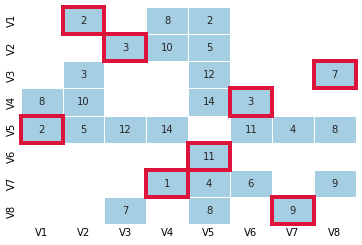

38.0
Ham!
38.0 is better than 38.0
-V2V1 -V6V7 -V7V6 

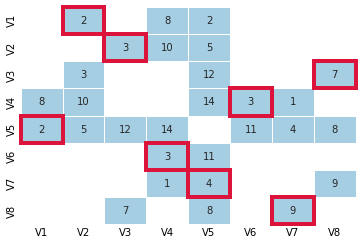

33.0
-V2V1 -V6V7 -V7V6 -V6V4 

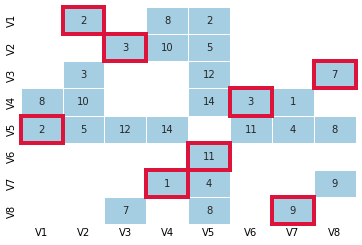

38.0
Ham!
38.0 is better than 38.0
-V2V1 -V6V7 -V7V6 -V4V6 

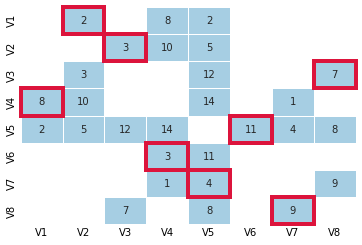

47.0
Ham!
38.0 is better than 47.0
-V2V1 -V7V4 

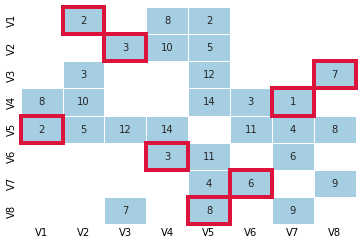

32.0
-V2V1 -V7V4 -V6V4 

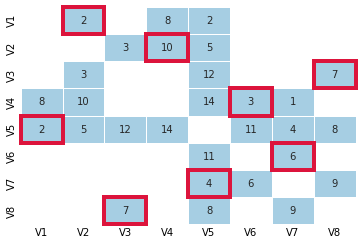

41.0
LB 41.0 is more than best - 38.0
-V2V1 -V7V4 -V4V7 

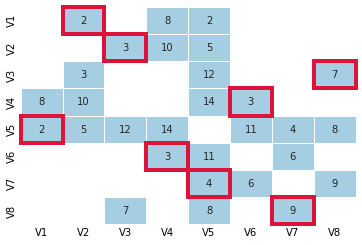

33.0
-V2V1 -V7V4 -V4V7 -V4V6 

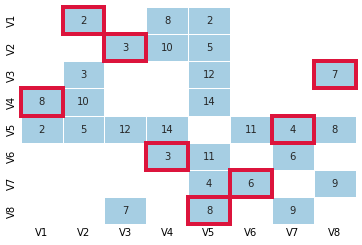

41.0
Ham!
38.0 is better than 41.0
-V2V1 -V7V4 -V4V7 -V6V4 

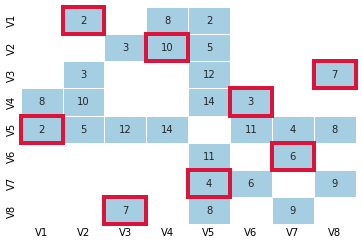

41.0
LB 41.0 is more than best - 38.0
-V2V1 -V7V4 -V7V6 

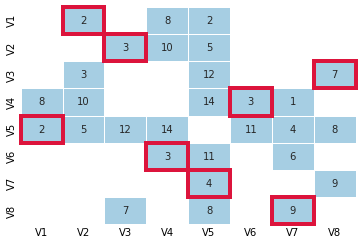

33.0
-V2V1 -V7V4 -V7V6 -V6V4 

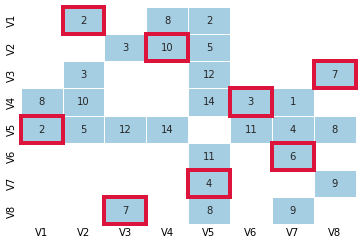

41.0
LB 41.0 is more than best - 38.0
-V2V1 -V7V4 -V7V6 -V4V6 

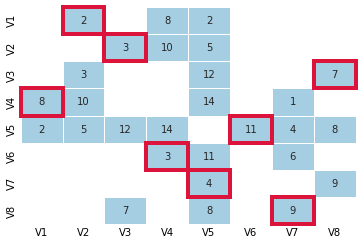

47.0
Ham!
38.0 is better than 47.0


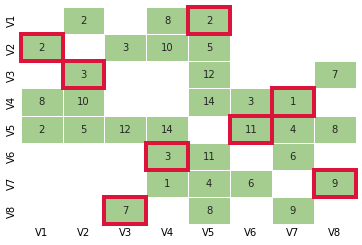

In [108]:
Sum, edges = brancH(G1, Label1)
HHC(edges, G1, Label1)

$G_2$

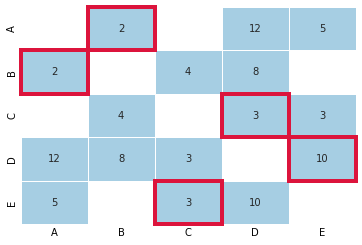

20.0
-AB 

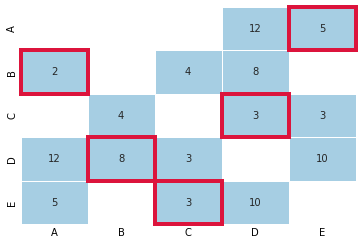

21.0
Ham!
new best cyc is 21.0
-BA 

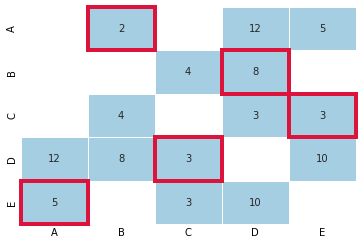

21.0
Ham!
21.0 is better than 21.0


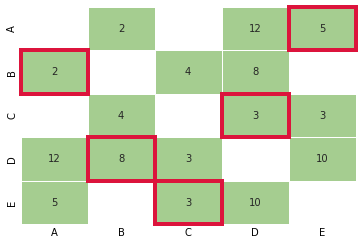

In [109]:
Sum, edges = brancH(G2, Label2)
HHC(edges, G2, Label2)

And $G_3$

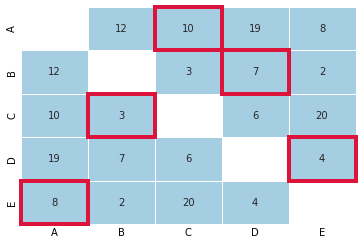

32.0
Ham!
new best cyc is 32.0


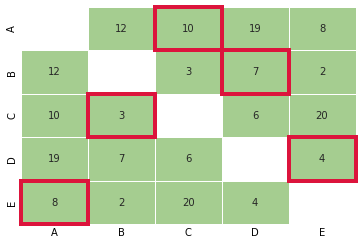

In [110]:
Sum, edges = brancH(G3, Label2)
HHC(edges, G3, Label2)